In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

sns.set()

In [2]:
tickers = ['XLB','XLE','XLF','XLI','XLK','XLP','XLU','XLV','XLY']
etf=yf.Tickers(tickers)
data = etf.history(start='2011-01-01',actions=False)
data = data.drop(['Open','High','Low','Volume'],axis=1)
data = data.droplevel(0,axis=1)

[*********************100%***********************]  9 of 9 completed


In [3]:
data

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2011-01-03,30.168978,45.762096,10.574049,27.754169,21.301203,21.268740,20.726183,25.937021,32.382442
2011-01-04,29.966404,45.369431,10.561073,27.714645,21.384832,21.210772,20.824909,26.018606,32.202770
2011-01-05,30.036512,45.549126,10.684326,27.856907,21.510283,21.218016,20.693270,26.075718,32.467983
2011-01-06,29.880688,45.116528,10.612967,27.809483,21.635736,21.145550,20.713022,26.181782,32.271214
2011-01-07,29.849520,45.442646,10.522148,27.864801,21.535370,21.036854,20.785425,26.165461,32.254108
...,...,...,...,...,...,...,...,...,...
2022-12-20,78.059998,84.750000,33.540001,97.239998,125.610001,74.220001,69.650002,134.440002,129.869995
2022-12-21,78.739998,86.360001,34.060001,99.070000,127.690002,74.959999,70.620003,136.210007,131.940002
2022-12-22,77.980003,84.370003,33.759998,97.809998,124.470001,74.790001,70.190002,136.020004,128.550003


In [4]:
#수익률 데이터
rets = data.pct_change().fillna(0)

#기대수익률
er = rets.mean() * 252

#공분산행렬
cov = rets.cov() * 252

In [5]:
er

XLB    0.102756
XLE    0.096202
XLF    0.123524
XLI    0.125994
XLK    0.170204
XLP    0.116095
XLU    0.119374
XLV    0.152527
XLY    0.134739
dtype: float64

In [6]:
cov

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
XLB,0.045412,0.045108,0.040591,0.038010,0.034618,0.020313,0.020256,0.026101,0.033367
XLE,0.045108,0.082601,0.047038,0.041918,0.034013,0.019868,0.020803,0.026116,0.033568
XLF,0.040591,0.047038,0.052039,0.040317,0.035924,0.021670,0.021150,0.028005,0.035536
XLI,0.038010,0.041918,0.040317,0.039889,0.033752,0.020356,0.020358,0.025677,0.032978
XLK,0.034618,0.034013,0.035924,0.033752,0.046733,0.020689,0.019209,0.027630,0.037702
XLP,0.020313,0.019868,0.021670,0.020356,0.020689,0.020382,0.018508,0.017864,0.019253
XLU,0.020256,0.020803,0.021150,0.020358,0.019209,0.018508,0.032184,0.017529,0.017828
XLV,0.026101,0.026116,0.028005,0.025677,0.027630,0.017864,0.017529,0.028435,0.024779
XLY,0.033367,0.033568,0.035536,0.032978,0.037702,0.019253,0.017828,0.024779,0.040482


# 포트폴리오 시뮬레이션

In [7]:
# 포트폴리오 수익률 리스트
p_returns = []
# 포트폴리오 변동성 리스트
p_volatility=[]

In [8]:
# 자산의 개수
noa = len(tickers)

#시뮬레이션 횟수
n_ports = 10000

In [9]:
for i in range(n_ports):
    #난수 생성해서 임의의 투자 가중치 배분
    weights = np.random.random(noa)
    weights = weights/np.sum(weights)
    
    ret = np.dot(weights, er) #포트폴리오 수익률
    vol = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))#포트폴리오 변동성
    
    p_returns.append(ret)
    p_volatility.append(vol)

In [11]:
p_returns[:10]

[0.127076098959895,
 0.12021951395251464,
 0.12335401258454158,
 0.1294760901053586,
 0.12652686174262875,
 0.1317246879054013,
 0.1277467522609886,
 0.12492462956845514,
 0.1227584732150853,
 0.12492029377924542]

In [12]:
#배열로 변환
prets = np.array(p_returns)
pvols = np.array(p_volatility)

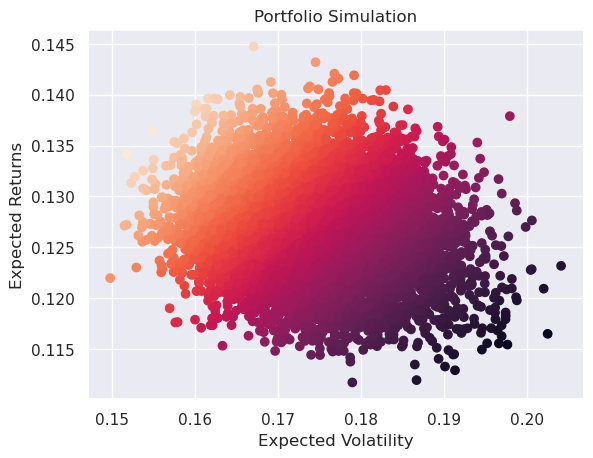

In [13]:
plt.scatter(x=pvols, y=prets, c=prets/pvols, marker='o')

plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')

plt.title('Portfolio Simulation')
plt.show()

# 최적화 모듈

* scipy.optimize.minimize

        scipy.optimize.minimize(
            fun: 목적함수
            x0: 초기값
            args: 초기값 외에 목적함수에 전달할 인자
            method: 최적화를 수행할 알고리즘의 종류
            bounds: 상하한 경계값
            constraints: 제약조건
            )

In [15]:
import scipy.optimize as sco

In [17]:
# 포트폴리오 통계치 계산 함수
def statistics(weights):
    weights = np.array(weights)
    
    pret = np.sum(er * weights)
    
    pvol = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))
    
    return np.array([pret,pvol,pret/pvol]) #수익률, 변동성, 샤프비율

In [18]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [20]:
np.sum(weights)

1.0

In [21]:
# 목적함수 정의
def obj_func(weights):
    return statistics(weights)[1] #변동성 기준 목적함수

In [26]:
# 수익률 수준별 포트폴리오 최적화 수행
trets = np.linspace(0.09, 0.16, 50) # 수익률 0.08~0.15까지 50번
tvols = []

#변동성 레벨 계산
for tret in trets:
    # 투자 가중치 초기값
    init_guess = np.repeat(1/noa, noa) #동일 가중치
    
    # 제약조건 (포트폴리오 목표 수익률, 현금 보유 비중 0)
    cons = ({'type':'eq','fun':lambda x: statistics(x)[0]-tret},
           {'type':'eq','fun':lambda x: np.sum(x)-1})

    # 자산별 경계조건 (숏 불가)
    bnds = tuple((0.0, 1.0) for x in weights)
    # 최적화 알고리즘 수행
    res = sco.minimize(obj_func,
                      init_guess,
                      method='SLSQP',
                      bounds=bnds,
                      constraints=cons)
    # 최적화 알고리즘을 통해 찾아낸
    tvols.append(res['fun'])
tvols=np.array(tvols)

In [32]:
# 좌측 경계선
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

Text(0.5, 1.0, 'Efficeint Frontier')

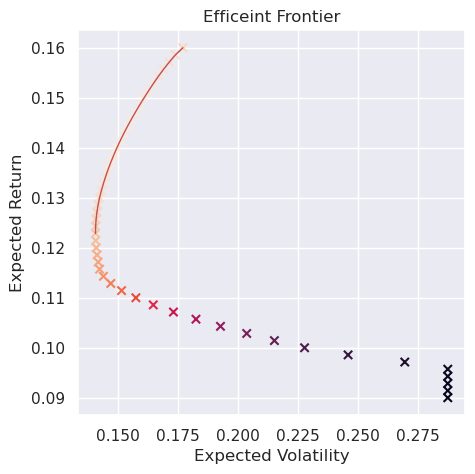

In [35]:
plt.figure(figsize=(5,5))
plt.scatter(tvols, trets, c=trets/tvols, marker='x')
plt.plot(evols, erets, 'r', lw=1.0)
plt.grid(True)

plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficeint Frontier')